In [4]:
from default_values import *
import default_values
reload(default_values)

from functions_root_nparray import *
import functions_root_nparray
reload(functions_root_nparray)

from functions_correlations import *
import functions_correlations
reload(functions_correlations)

from functions_fragmentation import *
import functions_fragmentation
reload(functions_fragmentation)

import numpy as np
from numpy import geomspace
import math
import matplotlib
from cycler import cycler
matplotlib.rcParams['axes.prop_cycle'] = cycler(color='brgmcyk')

import matplotlib.pyplot as plt
%matplotlib inline

import ROOT

../InputData/zT_Rebin_8_006zT06zT13fnew/pp_SE_L0_Correlation_GMB_Ratio.root
['pp', 'p-Pb']
[[0.18152603]
 [0.11831406]]


**root to numpy**

**Correlated Subtraction**: $C_S = \frac{C_{SR} \ \ - \ \ (1-p) C_{BR}}{p}$

**Pedestal Subtraction**

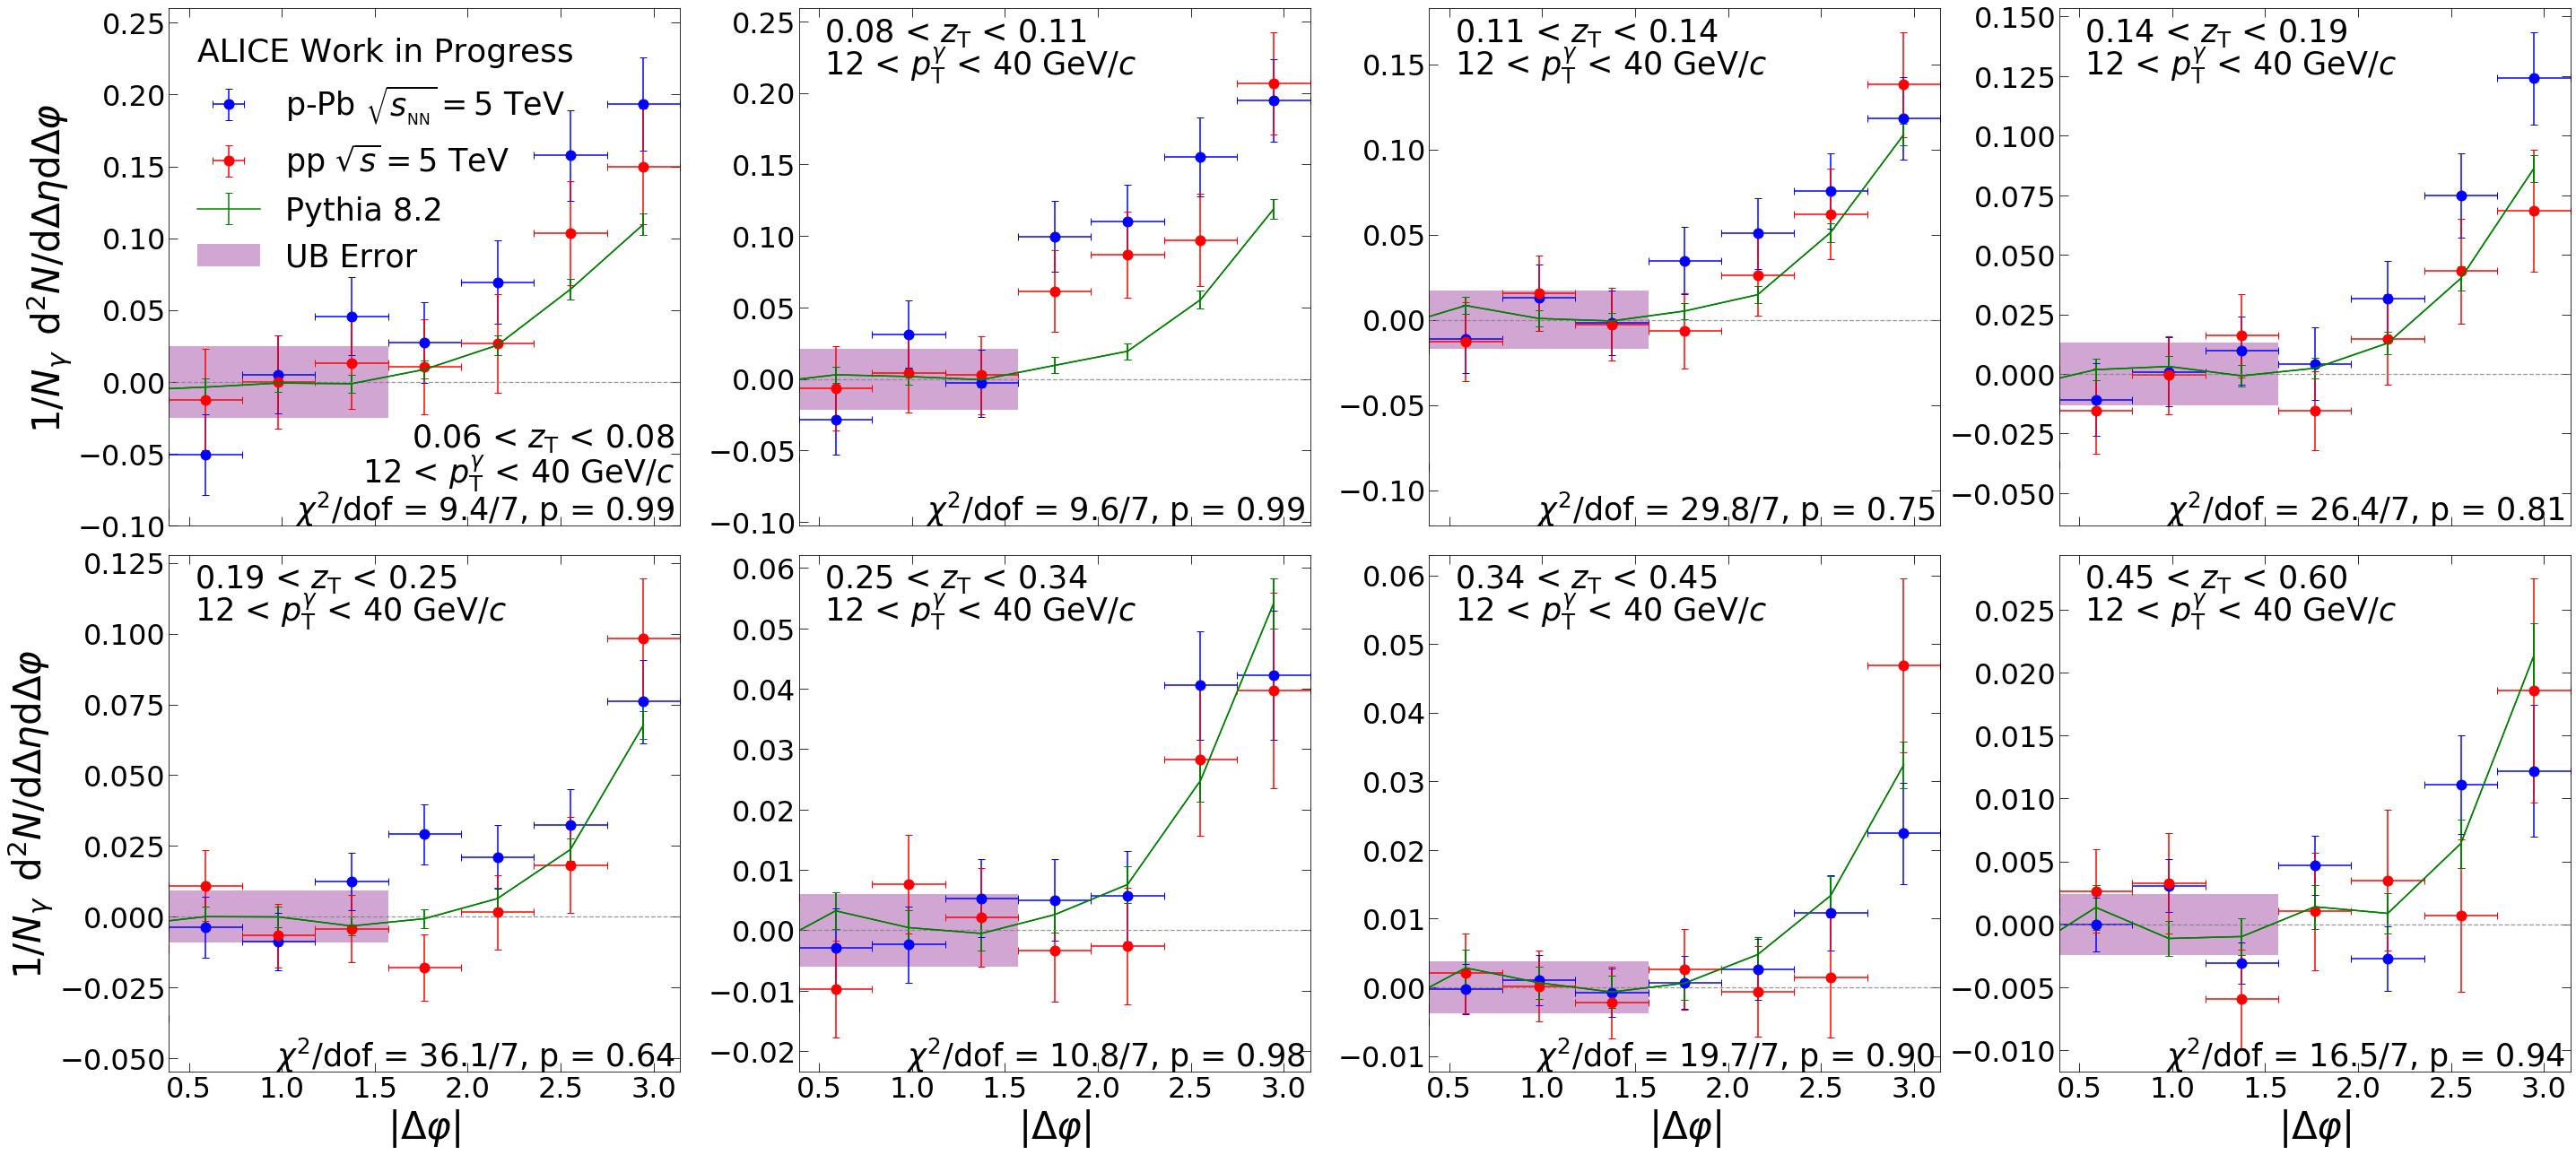

In [5]:
Corrs = ROOT_to_nparray()
Correlated_Subtraction_Weights(Corrs)
Ped_Sub_After_Cs(Corrs)
Plot_pp_pPb_Cs(Corrs)

In [3]:
Avg_Corr = Cs_Weighted_Average(Corrs)

In [4]:
Frags = Get_Fragmentation(Corrs)
#LaTeX_Results_Summary(Frags)
#LaTeX_Ratio_Systematics(Frags)

In [28]:
reload(functions_fragmentation)
from functions_fragmentation import *

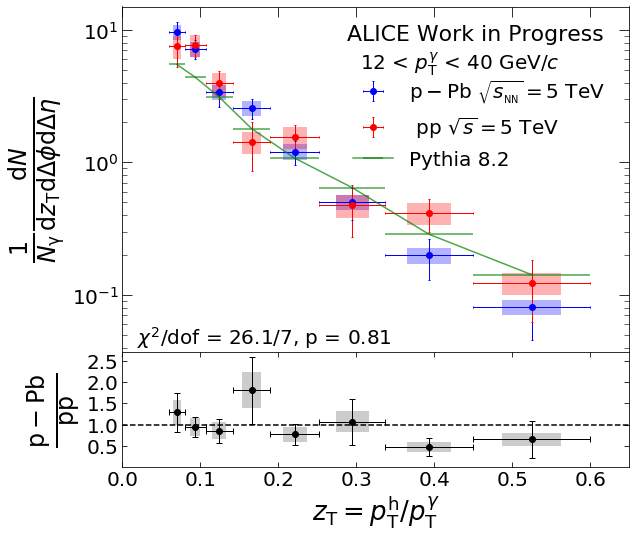

pp_purity_FF_Errors:
1.3607, 1.3910, 0.7157, 0.2594, 0.2829, 0.0858, 0.0753, 0.0225, 

p-Pb_FF_Errors:
1.8184, 1.1817, 0.7647, 0.4429, 0.2533, 0.1352, 0.0678, 0.0356, 

pp_FF_Errors:
2.2304, 1.4567, 0.9589, 0.5707, 0.3558, 0.2011, 0.1156, 0.0612, 

p-Pb_UE_FF_Errors:
0.7989, 0.5117, 0.3214, 0.1773, 0.0942, 0.0442, 0.0186, 0.0076, 

pp_FF:
7.4960, 7.6627, 3.9429, 1.4289, 1.5586, 0.4726, 0.4147, 0.1237, 

p-Pb_FF:
9.6662, 7.2158, 3.3785, 2.5843, 1.2066, 0.5032, 0.1984, 0.0814, 

pp_UE_FF_Errors:
0.9609, 0.6025, 0.3679, 0.2079, 0.1097, 0.0558, 0.0276, 0.0145, 

p-Pb_purity_FF_Errors:
1.1436, 0.8537, 0.3997, 0.3058, 0.1428, 0.0595, 0.0235, 0.0096, 



In [29]:
Combined_Frags = Average_FF(Frags)
Plot_pp_pPb_Avg_FF_and_Ratio(Combined_Frags)
print_from_Dict(Frags)

[0.21111047 0.17762167 0.14753435 0.12336292 0.10911249 0.1087555
 0.12241357 0.14621048 0.17608244 0.20944605 0.24487827 0.28159933
 0.31916469 0.35730816 0.39586265 0.43471882 0.47380245 0.51306157
 0.55245877 0.59196647]
0.772697672993


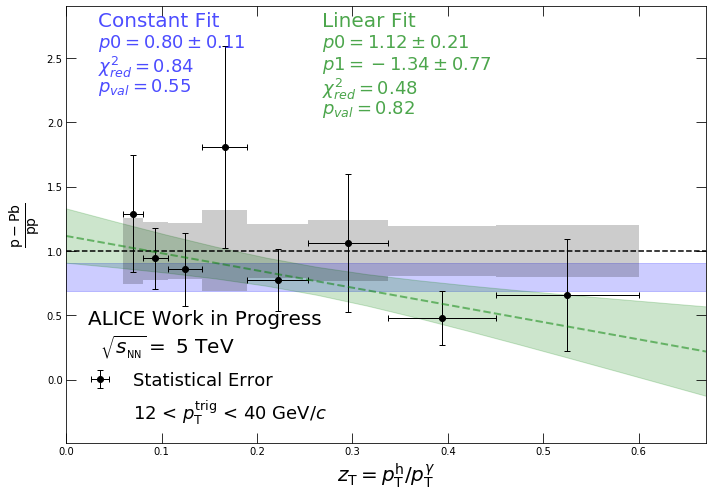

                Central Values:
[1.28952001 0.94167509 0.85686821 1.80860588 0.77413497 1.06466275
 0.47841622 0.65759981]

                Satistical Uncertainty Absolute:
[0.45393902 0.23628284 0.28468554 0.78597855 0.24008496 0.53581993
 0.21095817 0.43406015]

               Relative Satistical Uncertainty:
[0.3520217  0.25091759 0.33223958 0.43457702 0.31013321 0.50327668
 0.44095113 0.66006733]

                Ratio Uncertainty from Purity:
[0.23712613 0.21298978 0.20791709 0.28060763 0.20332393 0.22094971
 0.19014637 0.19749697]

                Ratio Uncertainty from Single Track Efficiency:
[0.10212477 0.07457686 0.0678605  0.14323428 0.06130836 0.08431699
 0.03788863 0.05207925]

                Full Systematic Uncertainty:
[0.25818263 0.22566869 0.21871114 0.31505032 0.21236604 0.23649129
 0.19388448 0.20424814]

                 Relative Full Systematic:
[0.20021607 0.23964602 0.25524478 0.17419512 0.2743269  0.22212789
 0.40526317 0.31059641]

                LaTeX Table:

In [7]:
pp_pPB_Avg_Ratio(Combined_Frags,0)
#pp_pPB_Avg_Ratio(Frags_Avg_Cs,0)

In [8]:
LaTeX_Table(Combined_Frags)

$z_\mathrm{T}$ Range & pp $\pm$ Stat. $\pm$ Sys & p--Pb $\pm$ Stat. $\pm$ Sys. \\
\hline
0.06--0.08 & 7.50$ \pm$ 2.23 $\pm$1.42 & 9.67$ \pm$ 1.82 $\pm$1.27 \\
0.08--0.11 & 7.66$ \pm$ 1.46 $\pm$1.46 & 7.22$ \pm$ 1.18 $\pm$0.94 \\
0.11--0.14 & 3.94$ \pm$ 0.96 $\pm$0.75 & 3.38$ \pm$ 0.76 $\pm$0.44 \\
0.14--0.19 & 1.43$ \pm$ 0.57 $\pm$0.27 & 2.58$ \pm$ 0.44 $\pm$0.34 \\
0.19--0.25 & 1.56$ \pm$ 0.36 $\pm$0.30 & 1.21$ \pm$ 0.25 $\pm$0.16 \\
0.25--0.34 & 0.47$ \pm$ 0.20 $\pm$0.09 & 0.50$ \pm$ 0.14 $\pm$0.07 \\
0.34--0.45 & 0.41$ \pm$ 0.12 $\pm$0.08 & 0.20$ \pm$ 0.07 $\pm$0.03 \\
0.45--0.60 & 0.12$ \pm$ 0.06 $\pm$0.02 & 0.08$ \pm$ 0.04 $\pm$0.01 \\


In [9]:
#Compare_FF_Integration([2.7,2.356,1.57],["7\pi/8","3\pi/4","\pi/2"])